<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/BitcoinDataDaily.csv')
#data= data[::-1] 
data.index.freg='Date'
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,270.826996,272.334991,267.085999,269.227997,269.227997,40301200
1,2015-07-10,269.156006,294.591003,268.802002,284.894012,284.894012,100390000
2,2015-07-11,284.880005,298.506012,283.529999,293.114990,293.114990,41109900
3,2015-07-12,293.140015,314.394012,292.505005,310.867004,310.867004,56405000
4,2015-07-13,310.826996,310.947998,281.010986,292.053986,292.053986,62053900
...,...,...,...,...,...,...,...
2553,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2554,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2555,2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520
2556,2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488


In [9]:
data.head(), data.tail()

(         Date        Open        High         Low       Close   Adj Close  \
 0  2015-07-09  270.826996  272.334991  267.085999  269.227997  269.227997   
 1  2015-07-10  269.156006  294.591003  268.802002  284.894012  284.894012   
 2  2015-07-11  284.880005  298.506012  283.529999  293.114990  293.114990   
 3  2015-07-12  293.140015  314.394012  292.505005  310.867004  310.867004   
 4  2015-07-13  310.826996  310.947998  281.010986  292.053986  292.053986   
 
       Volume  
 0   40301200  
 1  100390000  
 2   41109900  
 3   56405000  
 4   62053900  ,
             Date          Open          High           Low         Close  \
 2553  2022-07-05  20225.353516  20635.466797  19341.232422  20190.115234   
 2554  2022-07-06  20194.619141  20595.529297  19823.511719  20548.246094   
 2555  2022-07-07  20547.814453  21771.816406  20296.103516  21637.587891   
 2556  2022-07-08  21637.154297  22314.941406  21257.453125  21731.117188   
 2557  2022-07-09  21664.765625  21732.693359  2

In [11]:
open_price = data.iloc[:,1:2]
#open_price = data.iloc[:,2:2]
train_set = open_price[:1790].values
test_set = open_price[1790:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1790, 1)
Test size: (768, 1)


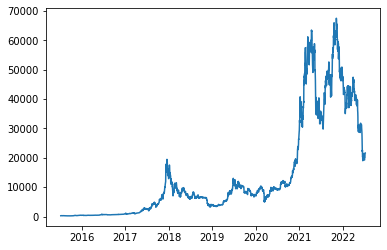

In [13]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price, fmt='-')
plt.savefig("BTC_hinh.png")

In [10]:
len(data)

2558

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [15]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [16]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,2558,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,2558)
y_train = x_train.reshape(-1,1)

#train_set_scaled = scaler.fit_transform(train_set)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

#x_train = scaler.fit_transform(x_train)
#y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,2558)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)


In [20]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 768 doan 1
n_input = 768
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [21]:
model.compile(optimizer='adam', loss='mse')

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 768, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 768, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 768, 50)           20200     
                                                                 
 dropout_4 (Dropout)         (None, 768, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [23]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

Epoch 1/20
48/48 [==============================] - 6s 27ms/step - loss: 0.0472 - val_loss: 0.0530
Epoch 2/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0275 - val_loss: 0.0239
Epoch 3/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 2.3579e-04
Epoch 4/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 5/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 2.1740e-04
Epoch 6/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 3.7429e-04
Epoch 7/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 8/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 1.1254e-04
Epoch 9/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 1.8500e-04
Epoch 10/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 1.909

INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


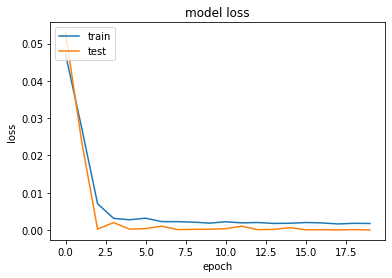

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

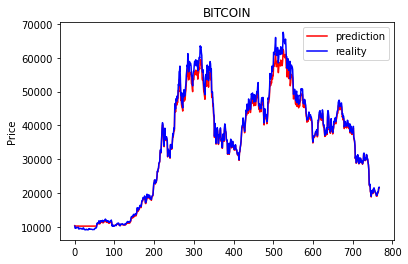

In [25]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:2018], color='r')
plt.plot(test_2[:2018] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [26]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[10297.795 ]
 [10168.363 ]
 [10174.112 ]
 [10189.657 ]
 [10175.087 ]
 [10173.806 ]
 [10185.332 ]
 [10186.872 ]
 [10189.    ]
 [10200.724 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10173.151 ]
 [10172.378 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.364 ]
 [10168.364 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10168.363 ]
 [10169.736 ]
 [10168.363 ]
 [10176.737 ]
 [10207.571 ]
 [10800.938 ]
 [10726.61  ]
 [10859.913 ]
 [10867.345 ]
 [11035.464 ]
 [11420.178 ]
 [10819.771 ]
 [10972.64  ]
 [10939.052 ]
 [11412.047 ]
 [11438.583 ]
 [11279.946 ]
 [11400.575 ]
 [11331.937 ]
 [11532.532 ]
 [1110

In [27]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

26/26 [==============================] - 1s 2ms/step - loss: 5.4994e-04
Test Score 0.0005499431281350553


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.023451


In [29]:
mape = np.mean(np.abs(np.array(predictions) - np.array(test_set))/np.abs(test_set))
print('MAPE: ' + str(mape))

MAPE: 0.9999894692618354
